In [2]:
#Kütüphaneler 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.exceptions import ConvergenceWarning
from sklearn.utils.testing import ignore_warnings

In [3]:
#Data okunur...
data = pd.read_csv("data.csv")

Veri'de Unnamed: 32 adında hepsi nan değerlerden oluşan bir feature vardır. Öğrenmeye bir katkısı olmayacağından bu feature çıkarılır. id adındaki feature da ezberlemeye sebep olacağından veriden çıkarılır. 

In [4]:
data.drop(['Unnamed: 32',"id"], axis=1, inplace=True)

Bizim veri kümemiz 30 tane feature dan kanser hücresinin iyi huylu(malignant) ya da kötü huylu(benign) olup olmadığını sınıflandırır. Bunu daha iyi bir şekilde yapabilmek için iyi huylu(malignant)=1 , kötü huylu(benign)=0 değerlerine eşitleriz. 

In [5]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

Veri kümemizi x ve y olarak iki kısıma ayırıyoruz. x verinin 30 feature lık kısmını içerir. y ise iyi huylu(malignant)=1 ya da kötü huylu(benign)=0 değerlerini içinde barındırır.

In [6]:
y = data.diagnosis.values
x_data = data.drop(['diagnosis'], axis=1)
y_d = data.diagnosis

Verilerimizi normalize ederiz. Çünkü bazı veriler bin küsürlerde bazıları 1 den küçük sayılar olabilir. Bu durum kullandığımız makine öğrenmesi algoritmalarında büyük değerli feature ların küçük değerli feature ları domine etmesine yani onları etkisiz hale getirmesine neden olur. Fakat verileri normalize edersek bu durumdan kaçınmış oluruz. Ve makine öğrenmesi algoritmalarımız doğru bir şekilde çalışır. 

In [7]:
#Normalization
x = (x_data -np.min(x_data))/(np.max(x_data)-np.min(x_data)).values


Verimizi eğitim ve test olmak üzere ikiye ayırırız.

In [8]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# feature names as a list
col = data.columns      
print(col)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [10]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


İyi huylu(malignant=1) tumor sayısı:  357
Kotu huylu(benign=0) tumor sayısı:  212


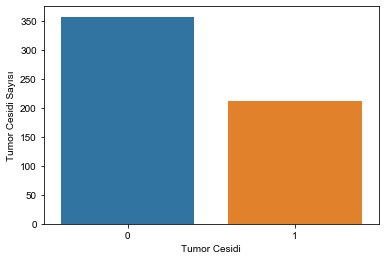

In [11]:
ax = sns.countplot(x="diagnosis" , data=data)     # M = 212, B = 357
sns.set(style="darkgrid")
plt.xlabel("Tumor Cesidi")
plt.ylabel("Tumor Cesidi Sayısı")
malignant , benign  = data.diagnosis.value_counts()
print("İyi huylu(malignant=1) tumor sayısı: ",malignant)
print("Kotu huylu(benign=0) tumor sayısı: ",benign)

In [12]:
"""
data = x_data
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y_d,data_n_2.iloc[:,0:15]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='degerler')

plt.figure(figsize=(25,10))
sns.boxplot(x="features", y="degerler", hue="diagnosis", data=data)

plt.xticks(rotation=90)
"""

'\ndata = x_data\ndata_n_2 = (data - data.mean()) / (data.std())              # standardization\ndata = pd.concat([y_d,data_n_2.iloc[:,0:15]],axis=1)\ndata = pd.melt(data,id_vars="diagnosis",\n                    var_name="features",\n                    value_name=\'degerler\')\n\nplt.figure(figsize=(25,10))\nsns.boxplot(x="features", y="degerler", hue="diagnosis", data=data)\n\nplt.xticks(rotation=90)\n'

In [13]:
"""
data = x_data
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y_d,data_n_2.iloc[:,15:30]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='degerler')

plt.figure(figsize=(25,10))
sns.boxplot(x="features", y="degerler", hue="diagnosis", data=data)

plt.xticks(rotation=90)
"""

'\ndata = x_data\ndata_n_2 = (data - data.mean()) / (data.std())              # standardization\ndata = pd.concat([y_d,data_n_2.iloc[:,15:30]],axis=1)\ndata = pd.melt(data,id_vars="diagnosis",\n                    var_name="features",\n                    value_name=\'degerler\')\n\nplt.figure(figsize=(25,10))\nsns.boxplot(x="features", y="degerler", hue="diagnosis", data=data)\n\nplt.xticks(rotation=90)\n'

In [14]:
"""
sns.set(style="whitegrid", palette="muted")
data = x_data
data_std = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y_d,data_std.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='degerler')
plt.figure(figsize=(15,10))
sns.swarmplot(x="features", y="degerler", hue="diagnosis", data=data)

plt.xticks(rotation=90)
"""

'\nsns.set(style="whitegrid", palette="muted")\ndata = x_data\ndata_std = (data - data.mean()) / (data.std())              # standardization\ndata = pd.concat([y_d,data_std.iloc[:,0:10]],axis=1)\ndata = pd.melt(data,id_vars="diagnosis",\n                    var_name="features",\n                    value_name=\'degerler\')\nplt.figure(figsize=(15,10))\nsns.swarmplot(x="features", y="degerler", hue="diagnosis", data=data)\n\nplt.xticks(rotation=90)\n'

In [15]:
"""
sns.set(style="whitegrid", palette="muted")
data = x_data
data_std = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y_d,data_std.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='degerler')
plt.figure(figsize=(15,10))
sns.swarmplot(x="features", y="degerler", hue="diagnosis", data=data)

plt.xticks(rotation=90)
"""

'\nsns.set(style="whitegrid", palette="muted")\ndata = x_data\ndata_std = (data - data.mean()) / (data.std())              # standardization\ndata = pd.concat([y_d,data_std.iloc[:,10:20]],axis=1)\ndata = pd.melt(data,id_vars="diagnosis",\n                    var_name="features",\n                    value_name=\'degerler\')\nplt.figure(figsize=(15,10))\nsns.swarmplot(x="features", y="degerler", hue="diagnosis", data=data)\n\nplt.xticks(rotation=90)\n'

In [16]:
"""
sns.set(style="whitegrid", palette="muted")
data = x_data
data_std = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y_d,data_std.iloc[:,20:30]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='degerler')
plt.figure(figsize=(15,10))
sns.swarmplot(x="features", y="degerler", hue="diagnosis", data=data)

plt.xticks(rotation=90)
"""

'\nsns.set(style="whitegrid", palette="muted")\ndata = x_data\ndata_std = (data - data.mean()) / (data.std())              # standardization\ndata = pd.concat([y_d,data_std.iloc[:,20:30]],axis=1)\ndata = pd.melt(data,id_vars="diagnosis",\n                    var_name="features",\n                    value_name=\'degerler\')\nplt.figure(figsize=(15,10))\nsns.swarmplot(x="features", y="degerler", hue="diagnosis", data=data)\n\nplt.xticks(rotation=90)\n'

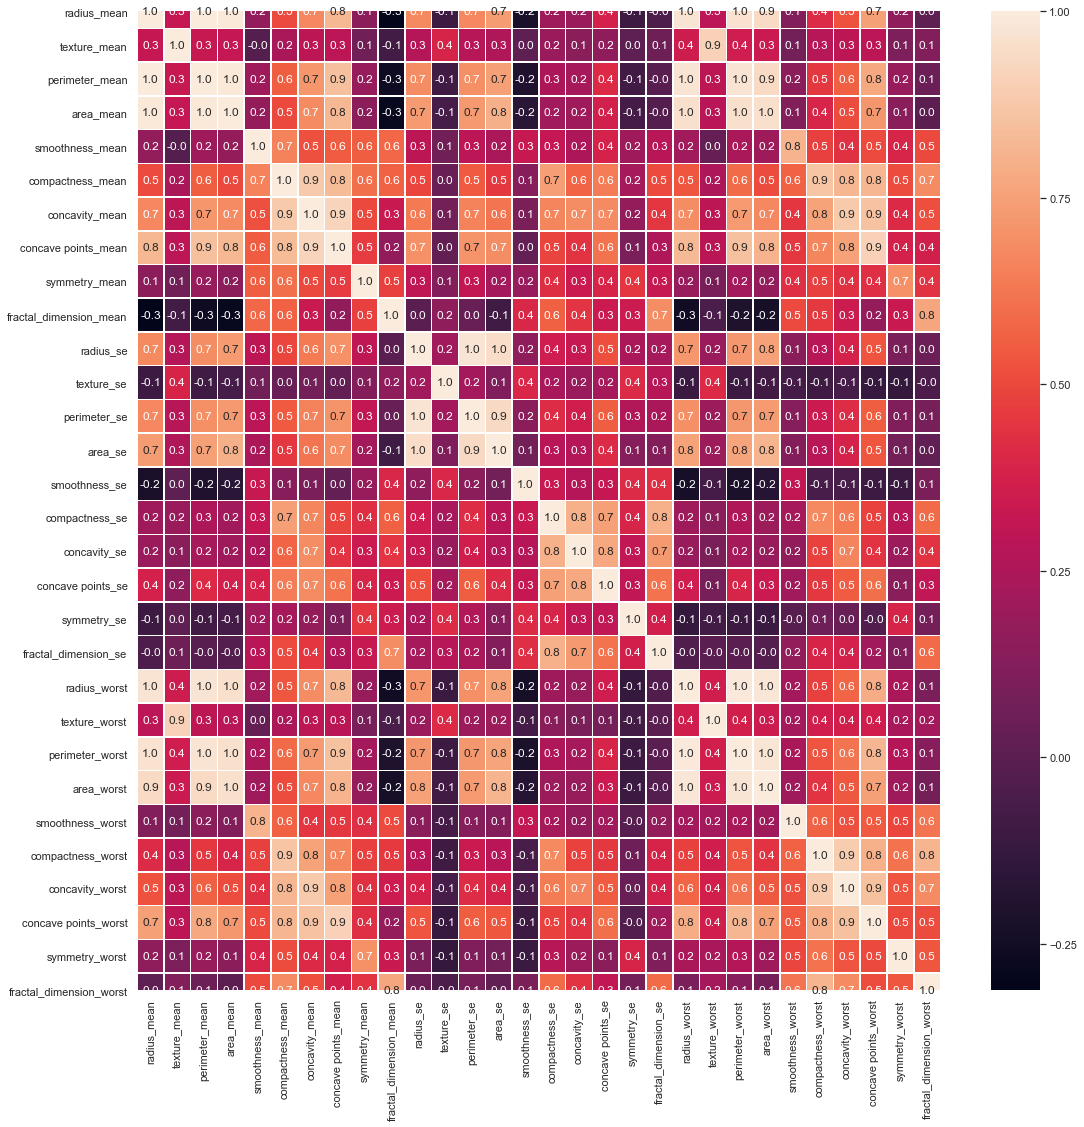

In [17]:

#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax) #30 features


In [18]:
drop_list1 = ['perimeter_mean','area_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','compactness_se','concave points_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later  18 features
x_1.head()

,radius_mean,texture_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.593753,0.703140,0.686364,0.605518,0.120469,0.273811,0.159296,0.135682,0.311645,0.183042,0.141525,0.450698,0.601136,0.568610,0.598462,0.418864
1,0.643144,0.272574,0.289880,0.203608,0.379798,0.141323,0.082589,0.125660,0.119387,0.046970,0.084539,0.091110,0.303571,0.435214,0.347553,0.192971,0.233590,0.222878
2,0.601496,0.390260,0.514309,0.462512,0.509596,0.211247,0.094303,0.162922,0.150831,0.096768,0.205690,0.127006,0.360075,0.374508,0.483590,0.359744,0.403706,0.213433
3,0.210090,0.360839,0.811321,0.565604,0.776263,1.000000,0.175875,0.038155,0.251453,0.142955,0.728148,0.287205,0.385928,0.094008,0.915472,0.548642,1.000000,0.773711
4,0.629893,0.156578,0.430351,0.463918,0.378283,0.186816,0.093065,0.163688,0.332359,0.143636,0.136179,0.145800,0.123934,0.341575,0.437364,0.319489,0.157500,0.142595


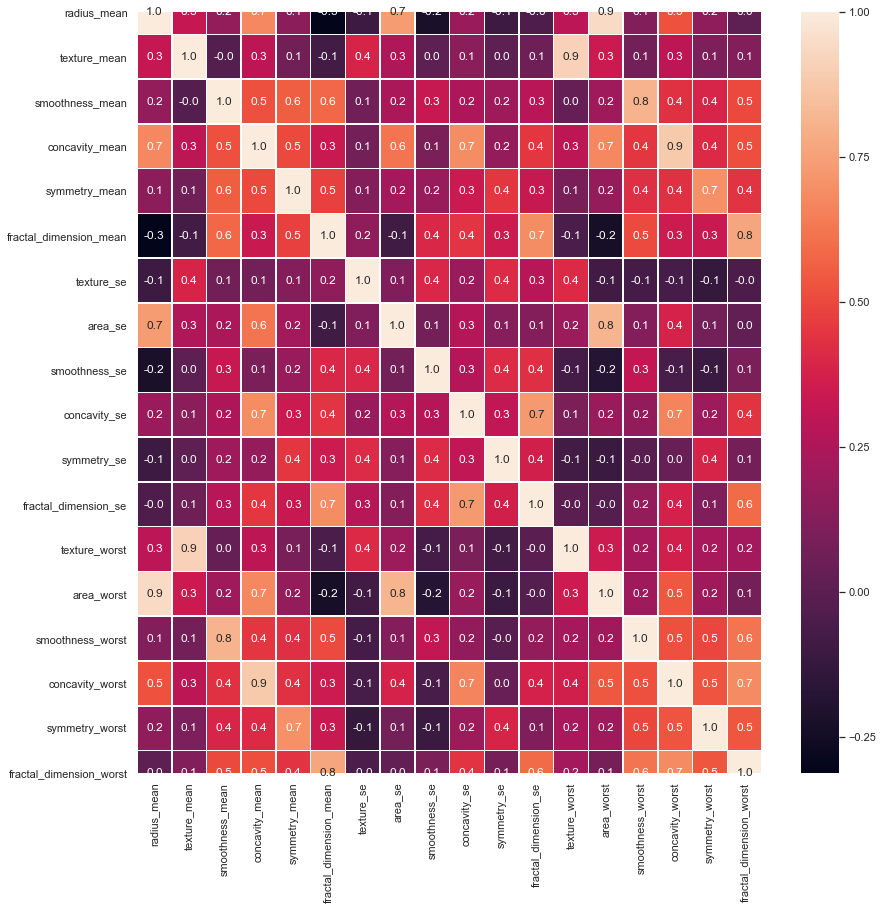

In [19]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [20]:
drop_list2 = ["texture_worst","smoothness_worst","concavity_worst","area_worst","fractal_dimension_worst","symmetry_mean",
              "texture_se","smoothness_se","fractal_dimension_se"] #refecv
x_2 = x_1.drop(drop_list2,axis = 1 )        # do not modify x, we will use it later   9 features
x_2.head()

,radius_mean,texture_mean,smoothness_mean,concavity_mean,fractal_dimension_mean,area_se,concavity_se,symmetry_se,symmetry_worst
0,0.521037,0.022658,0.593753,0.703140,0.605518,0.273811,0.135682,0.311645,0.598462
1,0.643144,0.272574,0.289880,0.203608,0.141323,0.125660,0.046970,0.084539,0.233590
2,0.601496,0.390260,0.514309,0.462512,0.211247,0.162922,0.096768,0.205690,0.403706
3,0.210090,0.360839,0.811321,0.565604,1.000000,0.038155,0.142955,0.728148,1.000000
4,0.629893,0.156578,0.430351,0.463918,0.186816,0.163688,0.143636,0.136179,0.157500


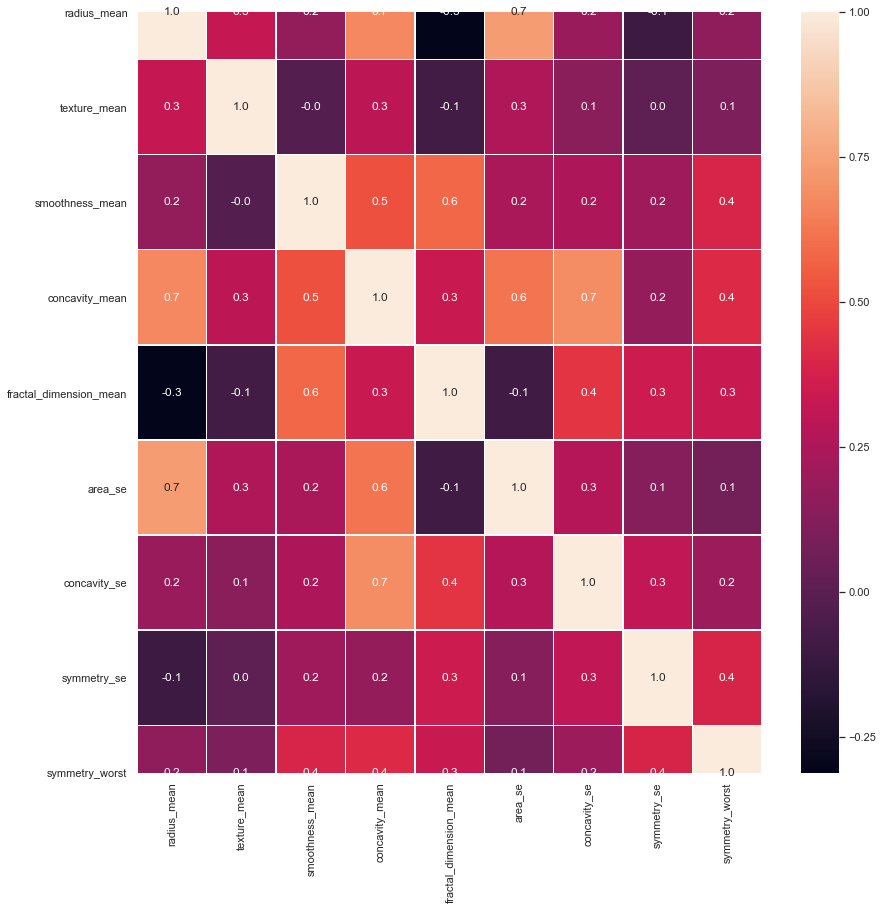

In [21]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_2.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Accuracy is:  0.9651162790697675


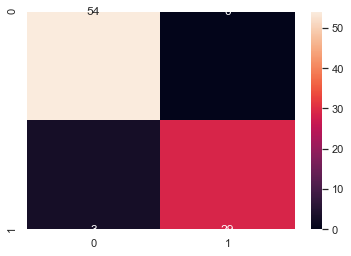

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 85 % and test  %15
x_train, x_test, y_train, y_test = train_test_split(x_2, y, test_size=0.15, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=42,n_estimators=10)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [2.06183190e+01 5.51685871e+00 2.60203437e+00 3.71881870e+01
 9.01039942e-03 1.67333251e+01 1.90889019e+00 4.43090489e-04
 5.46967901e+00]
Feature list: Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'concavity_mean',
       'fractal_dimension_mean', 'area_se', 'concavity_se', 'symmetry_se',
       'symmetry_worst'],
      dtype='object')


Accuracy is 5 best features:  0.9534883720930233


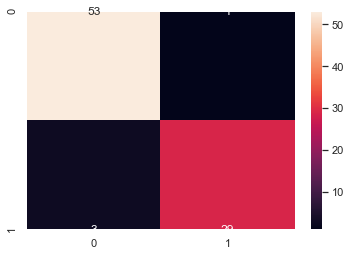

In [24]:
x_train_5_features = select_feature.transform(x_train)#(radius_mean,concavity_mean,area_se,symmetry_worst,texture_mean)
x_test_5_features = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier(random_state=42,n_estimators=10)      
clr_rf_2 = clf_rf_2.fit(x_train_5_features,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_5_features))
print('Accuracy is 5 best features: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_5_features))
sns.heatmap(cm_2,annot=True,fmt="d")

Feature ranking:
1. feature 3 (0.304017)
2. feature 0 (0.237697)
3. feature 5 (0.145017)
4. feature 1 (0.110524)
5. feature 6 (0.073251)
6. feature 8 (0.044692)
7. feature 2 (0.040055)
8. feature 7 (0.024083)
9. feature 4 (0.020664)


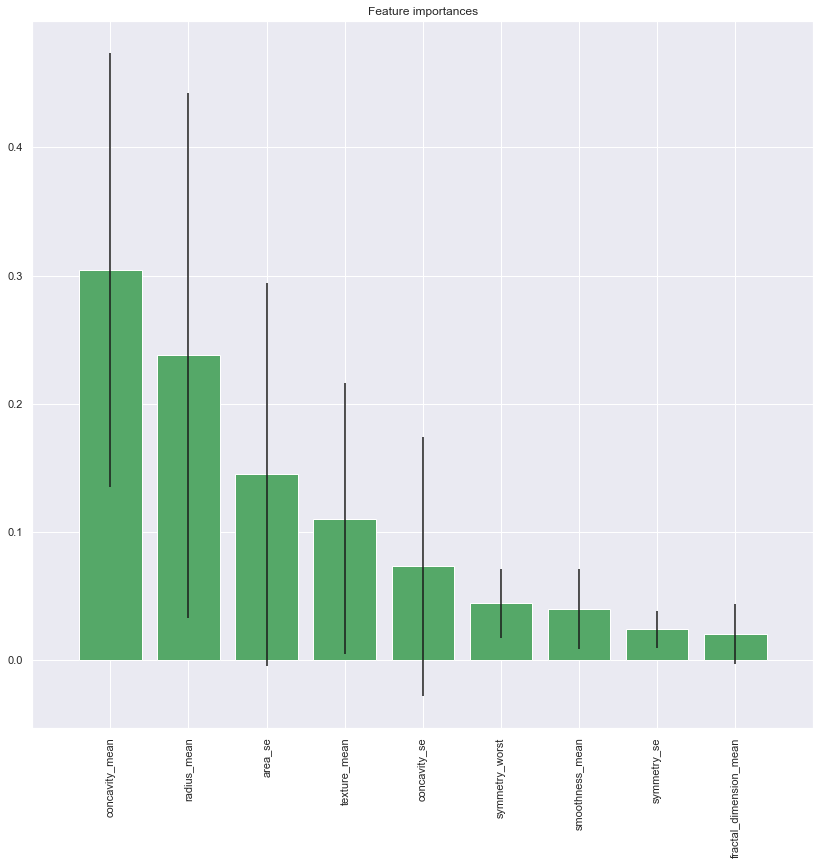

In [25]:
clf_rf_5 = RandomForestClassifier(random_state=42,n_estimators=10)      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [26]:
# split data train 85 % and test  %15
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42) #30 features
x_train1, x_test1, y_train, y_test = train_test_split(x_1, y, test_size=0.15, random_state=42) #18 features
x_train2, x_test2, y_train, y_test = train_test_split(x_2, y, test_size=0.15, random_state=42) #9 features

x_train = x_train.T
x_test = x_test.T
x_train1 = x_train1.T
x_test1 = x_test1.T
x_train2 = x_train2.T
x_test2 = x_test2.T
y_train = y_train.T
y_test = y_test.T

print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("x train_1: ",x_train1.shape)
print("x test_1: ",x_test1.shape)
print("x train_2: ",x_train2.shape)
print("x test_2: ",x_test2.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (30, 483)
x test:  (30, 86)
x train_1:  (18, 483)
x test_1:  (18, 86)
x train_2:  (9, 483)
x test_2:  (9, 86)
y train:  (483,)
y test:  (86,)


test accuracy 0.9767441860465116 for 30 features
avarage accuricies:  0.9605867346938777


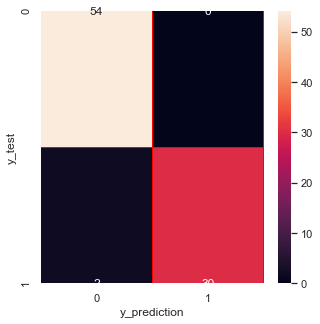

tuned hyperparameter K:  {'C': 10.0}
tuned parametreye gore en iyi accuracy (best score):  0.9772256728778468
test accuracy 0.9534883720930233 for 18 features
avarage accuricies:  0.9564200680272108


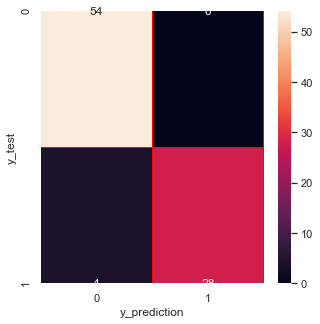

tuned hyperparameter K:  {'C': 10.0}
tuned parametreye gore en iyi accuracy (best score):  0.9710144927536232
test accuracy 0.9534883720930233 for 9 features
avarage accuricies:  0.9378401360544218


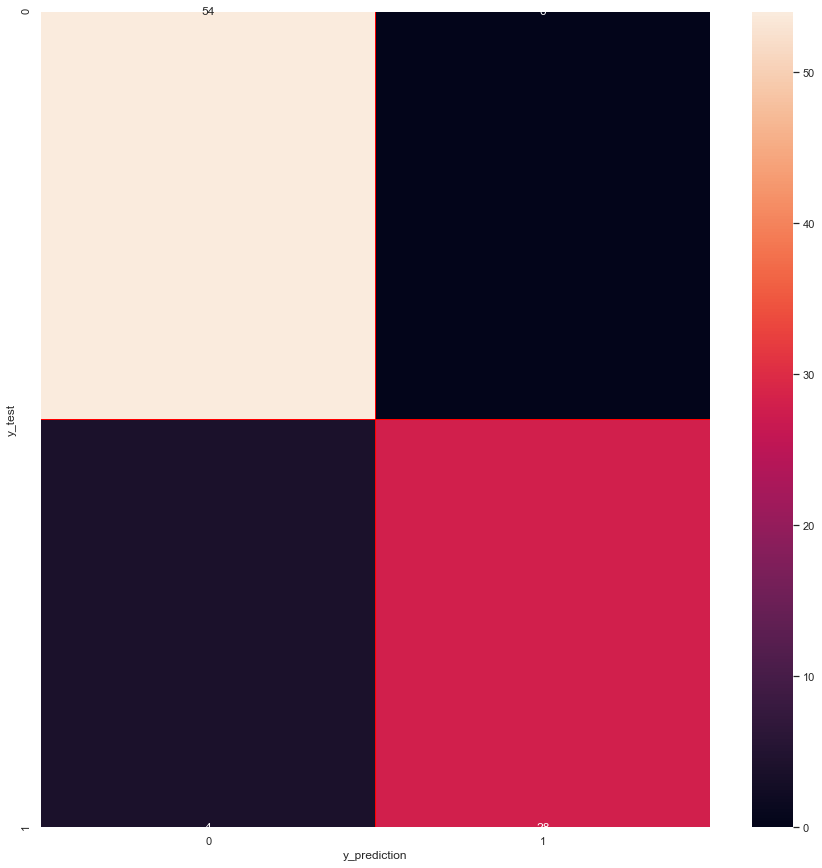

tuned hyperparameter K:  {'C': 215.44346900318823}
tuned parametreye gore en iyi accuracy (best score):  0.968944099378882


ValueError: X has 86 features per sample; expecting 30

In [27]:

from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
    
lr = LogisticRegression(solver = 'lbfgs', max_iter=1000)
lr1 = LogisticRegression(solver = 'lbfgs', max_iter=1000)
lr2 = LogisticRegression(solver = 'lbfgs', max_iter=1000)
lr.fit(x_train.T,y_train.T)

kfold = KFold(n_splits=10, random_state=42, shuffle=False)
accuricies = cross_val_score(lr,x_train.T,y_train.T,cv=kfold)
print("test accuracy {} for 30 features".format(lr.score(x_test.T,y_test.T)))
print("avarage accuricies: ",np.mean(accuricies))
y_prediction = lr.predict(x_test.T)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.T,y_prediction)

f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True , linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.show()

# %% grid search cross validation for knn

from sklearn.model_selection import GridSearchCV

grid = {"C":np.logspace(-3,3,10)}

lr_cv = GridSearchCV(lr, grid, cv = 10)  # GridSearchCV
lr_cv.fit(x_train.T,y_train.T)

#%% print hyperparameter KNN algoritmasindaki K degeri
print("tuned hyperparameter K: ",lr_cv.best_params_)
print("tuned parametreye gore en iyi accuracy (best score): ",lr_cv.best_score_)

lr1.fit(x_train1.T,y_train.T)

accuricies = cross_val_score(lr1,x_train1.T,y_train.T,cv=kfold)
print("test accuracy {} for 18 features".format(lr1.score(x_test1.T,y_test.T)))
print("avarage accuricies: ",np.mean(accuricies))

y_prediction = lr1.predict(x_test1.T)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.T,y_prediction)

f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True , linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.show()

# %% grid search cross validation for knn

from sklearn.model_selection import GridSearchCV

grid = {"C":np.logspace(-3,3,10)}

lr1_cv = GridSearchCV(lr1, grid, cv = 10)  # GridSearchCV
lr1_cv.fit(x_train1.T,y_train.T)

#%% print hyperparameter KNN algoritmasindaki K degeri
print("tuned hyperparameter K: ",lr1_cv.best_params_)
print("tuned parametreye gore en iyi accuracy (best score): ",lr1_cv.best_score_)


lr2.fit(x_train2.T,y_train.T)

accuricies = cross_val_score(lr2,x_train2.T,y_train.T,cv=kfold)
print("test accuracy {} for 9 features".format(lr2.score(x_test2.T,y_test.T)))
print("avarage accuricies: ",np.mean(accuricies))

y_prediction = lr2.predict(x_test2.T)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.T,y_prediction)

f,ax = plt.subplots(figsize = (15,15))
sns.heatmap(cm,annot = True , linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.show()

# %% grid search cross validation for knn

from sklearn.model_selection import GridSearchCV

grid = {"C":np.logspace(-3,3,10)}

lr2_cv = GridSearchCV(lr2, grid, cv = 10)  # GridSearchCV
lr2_cv.fit(x_train2.T,y_train.T)

#%% print hyperparameter KNN algoritmasindaki K degeri
print("tuned hyperparameter K: ",lr2_cv.best_params_)
print("tuned parametreye gore en iyi accuracy (best score): ",lr2_cv.best_score_)

probs = lr.predict_proba(x_test2)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'ROC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Oranı')
plt.xlabel('False Positive Oranı')
plt.show()

In [ ]:

from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# split data train 85 % and test  %15
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42) #30 features
x_train1, x_test1, y_train, y_test = train_test_split(x_1, y, test_size=0.15, random_state=42) #18 features
x_train2, x_test2, y_train, y_test = train_test_split(x_2, y, test_size=0.15, random_state=42) #9 features

knn = KNeighborsClassifier()
knn1 = KNeighborsClassifier()
knn2 = KNeighborsClassifier()
knn.fit(x_train,y_train)

kfold = KFold(n_splits=10, random_state=42, shuffle=False)
accuricies = cross_val_score(knn,x_train,y_train,cv=kfold)
print("test accuracy {} for 30 features".format(knn.score(x_test,y_test)))
print("avarage accuricies: ",np.mean(accuricies))
y_prediction = knn.predict(x_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_prediction)

f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True , linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.show()

# %% grid search cross validation for knn

from sklearn.model_selection import GridSearchCV

grid = {"n_neighbors":range(1,20) , "metric":["minkowski","manhattan","euclidean"]}

knn_cv = GridSearchCV(knn, grid, cv = 10)  # GridSearchCV
knn_cv.fit(x_train,y_train)

#%% print hyperparameter KNN algoritmasindaki K degeri
print("tuned hyperparameter K: ",knn_cv.best_params_)
print("tuned parametreye gore en iyi accuracy (best score): ",knn_cv.best_score_)

knn1.fit(x_train1,y_train)

accuricies = cross_val_score(knn1,x_train1,y_train,cv=kfold)
print("test accuracy {} for 18 features".format(knn1.score(x_test1,y_test)))
print("avarage accuricies: ",np.mean(accuricies))

y_prediction = knn1.predict(x_test1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_prediction)

f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True , linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.show()

# %% grid search cross validation for knn

from sklearn.model_selection import GridSearchCV

grid = {"n_neighbors":range(1,20) , "metric":["minkowski","manhattan","euclidean"]}

knn1_cv = GridSearchCV(knn1, grid, cv = 10)  # GridSearchCV
knn1_cv.fit(x_train1,y_train)

#%% print hyperparameter KNN algoritmasindaki K degeri
print("tuned hyperparameter K: ",knn1_cv.best_params_)
print("tuned parametreye gore en iyi accuracy (best score): ",knn1_cv.best_score_)

knn2.fit(x_train2,y_train)

accuricies = cross_val_score(knn2,x_train2,y_train,cv=kfold)
print("test accuracy {} for 9 features".format(knn2.score(x_test2,y_test)))
print("avarage accuricies: ",np.mean(accuricies))

y_prediction = knn2.predict(x_test2)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_prediction)

f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True , linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.show()

# %% grid search cross validation for knn

from sklearn.model_selection import GridSearchCV

grid = {"n_neighbors":range(1,20) , "metric":["minkowski","manhattan","euclidean"]}

knn2_cv = GridSearchCV(knn2, grid, cv = 10)  # GridSearchCV
knn2_cv.fit(x_train2,y_train)

#%% print hyperparameter KNN algoritmasindaki K degeri
print("tuned hyperparameter K: ",knn2_cv.best_params_)
print("tuned parametreye gore en iyi accuracy (best score): ",knn2_cv.best_score_)

probs = knn2.predict_proba(x_test2)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'ROC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Oranı')
plt.xlabel('False Positive Oranı')
plt.show()

In [ ]:

from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# split data train 85 % and test  %15
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42) #30 features
x_train1, x_test1, y_train, y_test = train_test_split(x_1, y, test_size=0.15, random_state=42) #18 features
x_train2, x_test2, y_train, y_test = train_test_split(x_2, y, test_size=0.15, random_state=42) #9 features

svm = SVC(gamma='scale')
svm1 = SVC(gamma='scale')
svm2 = SVC(gamma='scale')
svm.fit(x_train,y_train)

kfold = KFold(n_splits=10, random_state=42, shuffle=False)
accuricies = cross_val_score(svm,x_train,y_train,cv=kfold)
print("test accuracy {} for 30 features".format(svm.score(x_test,y_test)))
print("avarage accuricies: ",np.mean(accuricies))
y_prediction = svm.predict(x_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_prediction)

f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True , linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.show()

# %% grid search cross validation for knn

from sklearn.model_selection import GridSearchCV

grid = {"C":np.logspace(-3,3,10) , "kernel":["linear","poly","rbf","sigmoid"]}

svm_cv = GridSearchCV(svm, grid, cv = 10)  # GridSearchCV
svm_cv.fit(x_train,y_train)

#%% print hyperparameter KNN algoritmasindaki K degeri
print("tuned hyperparameter C and kernel: ",svm_cv.best_params_)
print("tuned parametreye gore en iyi accuracy (best score): ",svm_cv.best_score_)

svm1.fit(x_train1,y_train)

accuricies = cross_val_score(svm1,x_train1,y_train,cv=kfold)
print("test accuracy {} for 18 features".format(svm1.score(x_test1,y_test)))
print("avarage accuricies: ",np.mean(accuricies))

y_prediction = svm1.predict(x_test1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_prediction)

f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True , linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.show()

# %% grid search cross validation for knn

from sklearn.model_selection import GridSearchCV

grid = {"C":np.logspace(-3,3,10) }

svm1_cv = GridSearchCV(svm1, grid, cv = 10)  # GridSearchCV
svm1_cv.fit(x_train1,y_train)

#%% print hyperparameter KNN algoritmasindaki K degeri
print("tuned hyperparameter C and kernel: ",svm1_cv.best_params_)
print("tuned parametreye gore en iyi accuracy (best score): ",svm1_cv.best_score_)

svm2.fit(x_train2,y_train)

accuricies = cross_val_score(svm2,x_train2,y_train,cv=kfold)
print("test accuracy {} for 9 features".format(svm2.score(x_test2,y_test)))
print("avarage accuricies: ",np.mean(accuricies))

y_prediction = svm2.predict(x_test2)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_prediction)

f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True , linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.show()

# %% grid search cross validation for knn

from sklearn.model_selection import GridSearchCV

grid = {"C":np.logspace(-3,3,10) , "kernel":["linear","poly","rbf","sigmoid"]}

svm2_cv = GridSearchCV(svm2, grid, cv = 10)  # GridSearchCV
svm2_cv.fit(x_train2,y_train)

#%% print hyperparameter KNN algoritmasindaki K degeri
print("tuned hyperparameter C and kernel: ",svm2_cv.best_params_)
print("tuned parametreye gore en iyi accuracy (best score): ",svm2_cv.best_score_)

probs = svm.predict_proba(x_test2)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'ROC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Oranı')
plt.xlabel('False Positive Oranı')
plt.show()

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



# split data train 85 % and test  %15
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42) #30 features
x_train1, x_test1, y_train, y_test = train_test_split(x_1, y, test_size=0.15, random_state=42) #18 features
x_train2, x_test2, y_train, y_test = train_test_split(x_2, y, test_size=0.15, random_state=42) #9 features

nb = GaussianNB()
nb1 = GaussianNB()
nb2 = GaussianNB()
nb.fit(x_train,y_train)

kfold = KFold(n_splits=10, random_state=42, shuffle=False)
accuricies = cross_val_score(nb,x_train,y_train,cv=kfold)
print("test accuracy {} for 30 features".format(nb.score(x_test,y_test)))
print("avarage accuricies: ",np.mean(accuricies))
y_prediction = nb.predict(x_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_prediction)

f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True , linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.show()


nb1.fit(x_train1,y_train)

accuricies = cross_val_score(nb1,x_train1,y_train,cv=kfold)
print("test accuracy {} for 18 features".format(nb1.score(x_test1,y_test)))
print("avarage accuricies: ",np.mean(accuricies))

y_prediction = nb1.predict(x_test1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_prediction)

f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True , linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.show()


nb2.fit(x_train2,y_train)

accuricies = cross_val_score(nb2,x_train2,y_train,cv=kfold)
print("test accuracy {} for 9 features".format(nb2.score(x_test2,y_test)))
print("avarage accuricies: ",np.mean(accuricies))

y_prediction = nb2.predict(x_test2)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_prediction)

f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True , linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.show()

probs = nb1.predict_proba(x_test2)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'ROC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Oranı')
plt.xlabel('False Positive Oranı')
plt.show()



In [ ]:
#Decision Tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold


# split data train 85 % and test  %15
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42) #30 features
x_train1, x_test1, y_train, y_test = train_test_split(x_1, y, test_size=0.15, random_state=42) #18 features
x_train2, x_test2, y_train, y_test = train_test_split(x_2, y, test_size=0.15, random_state=42) #9 features

dc = DecisionTreeClassifier()
dc1 = DecisionTreeClassifier()
dc2 = DecisionTreeClassifier()
dc.fit(x_train,y_train)

kfold = KFold(n_splits=10, random_state=42, shuffle=False)
accuricies = cross_val_score(dc,x_train,y_train,cv=kfold)
print("test accuracy {} for 30 features".format(dc.score(x_test,y_test)))
print("avarage accuricies: ",np.mean(accuricies))
y_prediction = dc.predict(x_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_prediction)

f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True , linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.show()

# %% grid search cross validation for knn

from sklearn.model_selection import GridSearchCV

grid = {"criterion":["gini","entropy"] , "splitter":["best","random"]}

dc_cv = GridSearchCV(dc, grid, cv = 10)  # GridSearchCV
dc_cv.fit(x_train,y_train)

#%% print hyperparameter KNN algoritmasindaki K degeri
print("tuned hyperparameter criterion and splitter: ",dc_cv.best_params_)
print("tuned parametreye gore en iyi accuracy (best score): ",dc_cv.best_score_)

dc1.fit(x_train1,y_train)

accuricies = cross_val_score(dc1,x_train1,y_train,cv=kfold)
print("test accuracy {} for 18 features".format(dc1.score(x_test1,y_test)))
print("avarage accuricies: ",np.mean(accuricies))

y_prediction = dc1.predict(x_test1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_prediction)

f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True , linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.show()

# %% grid search cross validation for knn

from sklearn.model_selection import GridSearchCV

grid = {"criterion":["gini","entropy"] , "splitter":["best","random"]}

dc1_cv = GridSearchCV(dc1, grid, cv = 10)  # GridSearchCV
dc1_cv.fit(x_train1,y_train)

#%% print hyperparameter KNN algoritmasindaki K degeri
print("tuned hyperparameter criterion and splitter: ",dc1_cv.best_params_)
print("tuned parametreye gore en iyi accuracy (best score): ",dc1_cv.best_score_)

dc2.fit(x_train2,y_train)

accuricies = cross_val_score(dc2,x_train2,y_train,cv=kfold)
print("test accuracy {} for 9 features".format(dc2.score(x_test2,y_test)))
print("avarage accuricies: ",np.mean(accuricies))

y_prediction = dc2.predict(x_test2)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_prediction)

f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True , linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.show()

# %% grid search cross validation for knn

from sklearn.model_selection import GridSearchCV

grid = {"criterion":["gini","entropy"] , "splitter":["best","random"]}

dc2_cv = GridSearchCV(dc2, grid, cv = 10)  # GridSearchCV
dc2_cv.fit(x_train2,y_train)

#%% print hyperparameter KNN algoritmasindaki K degeri
print("tuned hyperparameter criterion and splitter: ",dc2_cv.best_params_)
print("tuned parametreye gore en iyi accuracy (best score): ",dc2_cv.best_score_)

probs = dc2.predict_proba(x_test2)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'ROC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Oranı')
plt.xlabel('False Positive Oranı')
plt.show()


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold


# split data train 85 % and test  %15
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42) #30 features
x_train1, x_test1, y_train, y_test = train_test_split(x_1, y, test_size=0.15, random_state=42) #18 features
x_train2, x_test2, y_train, y_test = train_test_split(x_2, y, test_size=0.15, random_state=42) #9 features

rf = RandomForestClassifier()
rf1 = RandomForestClassifier()
rf2 = RandomForestClassifier()
rf.fit(x_train,y_train)

kfold = KFold(n_splits=10, random_state=42, shuffle=False)
accuricies = cross_val_score(rf,x_train,y_train,cv=kfold)
print("test accuracy {} for 30 features".format(rf.score(x_test,y_test)))
print("avarage accuricies: ",np.mean(accuricies))
y_prediction = rf.predict(x_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_prediction)

f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True , linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.show()

# %% grid search cross validation for knn

from sklearn.model_selection import GridSearchCV

grid = {"criterion":["gini","entropy"] , "n_estimators":range(10,100)}

rf_cv = GridSearchCV(rf, grid, cv = 10)  # GridSearchCV
rf_cv.fit(x_train,y_train)

#%% print hyperparameter KNN algoritmasindaki K degeri
print("tuned hyperparameter criterion and n_estimators: ",rf_cv.best_params_)
print("tuned parametreye gore en iyi accuracy (best score): ",rf_cv.best_score_)

rf1.fit(x_train1,y_train)

accuricies = cross_val_score(rf1,x_train1,y_train,cv=kfold)
print("test accuracy {} for 18 features".format(rf1.score(x_test1,y_test)))
print("avarage accuricies: ",np.mean(accuricies))

y_prediction = rf1.predict(x_test1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_prediction)

f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True , linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.show()

# %% grid search cross validation for knn

from sklearn.model_selection import GridSearchCV

grid = {"criterion":["gini","entropy"] , "n_estimators":range(1,20)}

rf1_cv = GridSearchCV(rf1, grid, cv = 10)  # GridSearchCV
rf1_cv.fit(x_train1,y_train)

#%% print hyperparameter KNN algoritmasindaki K degeri
print("tuned hyperparameter criterion and n_estimators: ",rf1_cv.best_params_)
print("tuned parametreye gore en iyi accuracy (best score): ",rf1_cv.best_score_)

rf2.fit(x_train2,y_train)

accuricies = cross_val_score(rf2,x_train2,y_train,cv=kfold)
print("test accuracy {} for 9 features".format(rf2.score(x_test2,y_test)))
print("avarage accuricies: ",np.mean(accuricies))

y_prediction = rf2.predict(x_test2)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_prediction)

f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True , linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.show()

# %% grid search cross validation for knn

from sklearn.model_selection import GridSearchCV

grid = {"criterion":["gini","entropy"] , "n_estimators":range(10,100)}

rf2_cv = GridSearchCV(rf2, grid, cv = 10)  # GridSearchCV
rf2_cv.fit(x_train2,y_train)

#%% print hyperparameter KNN algoritmasindaki K degeri
print("tuned hyperparameter criterion and n_estimators: ",rf2_cv.best_params_)
print("tuned parametreye gore en iyi accuracy (best score): ",rf2_cv.best_score_)

probs = rf2.predict_proba(x_test2)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'ROC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Oranı')
plt.xlabel('False Positive Oranı')
plt.show()
